## Tarea 3: Método de bisección

In [1]:
# Importamos las librerias que se van a usar
import numpy as np
import matplotlib.pyplot as plt
import math 

### Ejercicio 1: Aplique el método de bisección para encontrar las soluciones exactas dentro de $10^{-2}$ para $x^3-7x^2+14x-6 = 0$ en cada intervalo. Grafique la función indicando dónde se encuentra cada raíz.

##### Para satisfacer la condición de exactitud dentro de $10^{-2}$, se debe cumplir la condición
\begin{equation}
\frac{b-a}{2^n}< 10^2,
\end{equation}
##### donde $a$ y $b$ son los límites del intervalo y $n$ el número de iteraciones que grantiza la exactitud deseada. Para este ejercicio se tiene tres intervalos: [0,1], [1,3.2] y [3.2,4]. Calculamos el valor de $n$ para cada intervalo
###### a)  [0,1]
\begin{equation}
\frac{1-0}{2^n}< 10^{-2} \rightarrow \log_{10}{2^{-n}}< \log_{10}{10^{-2}}  \rightarrow -n\log_{10}{2}< -2 \rightarrow  n > \frac{2}{\log_{10}2} \approx 6.64
\end{equation}
##### por tanto el número de iteraciones debe ser 7
###### b)  [1,3.2]
\begin{equation}
\frac{3.2-1}{2^n}< 10^{-2} \rightarrow \log_{10}{(2.2(2^{-n}))}< \log_{10}{10^{-2}}  \rightarrow -n\log_{10}{2} + \log_{10}{2.2} < -2 \rightarrow  n > \frac{2 + \log_{10} (2.2)}{\log_{10}2} \approx 7.78
\end{equation}
##### por tanto el número de iteraciones debe ser 8
###### b)  [3.2,4]
\begin{equation}
\frac{4-3.2}{2^n}< 10^{-2} \rightarrow \log_{10}{(0.8(2^{-n}))}< \log_{10}{10^{-2}}  \rightarrow -n\log_{10}{2} + \log_{10}{0.8} < -2 \rightarrow  n > \frac{2 + \log_{10} (0.8)}{\log_{10}2} \approx 6.32
\end{equation}
##### por tanto el número de iteraciones debe ser 7
#### Se definió la siguiente función que calcula la raíz de la ecuación en cuestion y cuyos valores de entrada son los límites del intervalo y el número máximo de iteraciones


In [93]:
def biseccion(a,b,Nmax):
    TOL = 0.01  #TOL es el patámetro de tolerancia para la convergencia del algoritmo
    FA = a**3-7*a**2+14*a-6    #F(a)
    FP = 100                #F(p)
    exito = False
    i = 1
    p = 5

#Realizamos el proceso iterativo
    while i <= Nmax:
        p = a + (b-a)/2.00  # Calculamos el punto medio
        FP = p**3-7*p**2+14*p-6 
        ERR = abs(FP-FA)   #Calculamos el error relativo que queremos sea menor a 10^-2 (TOL)
        print(i,a,b,p,FP,ERR)
        if((ERR<=TOL)or(abs(FP)<TOL)):   #¿Es solución?   #abs(FP)< TOL 
            print("La raíz es:")
            print(p)
            exito = True
            break   # Salir del ciclo
        elif(FA*FP > 0):
            a = p
            FA = FP
        else:
            b = p
        i = i+1
    
    if exito == False:
        print("Proceso no exitoso")

#### Llamamos la función para cada intervalo con el número máximo de iteraciones encontradas

In [94]:
#Para el intervalo [0,1]
biseccion(0,1.0,7)

1 0 1.0 0.5 -0.625 5.375
2 0.5 1.0 0.75 0.984375 1.609375
3 0.5 0.75 0.625 0.259765625 0.884765625
4 0.5 0.625 0.5625 -0.161865234375 0.463134765625
5 0.5625 0.625 0.59375 0.054046630859375 0.215911865234375
6 0.5625 0.59375 0.578125 -0.052623748779296875 0.10924148559570312
7 0.578125 0.59375 0.5859375 0.0010313987731933594 0.053655147552490234
La raíz es:
0.5859375


In [95]:
#Para el intervalo [1,3.2]
biseccion(1,3.2,8)

1 1 3.2 2.1 1.7910000000000004 0.20899999999999963
2 2.1 3.2 2.6500000000000004 0.5521250000000038 1.2388749999999966
3 2.6500000000000004 3.2 2.9250000000000003 0.08582812500000614 0.4662968749999976
4 2.9250000000000003 3.2 3.0625 -0.054443359375 0.14027148437500614
5 2.9250000000000003 3.0625 2.9937500000000004 0.006327880859373636 0.0795002441406325
La raíz es:
2.9937500000000004


In [96]:
#Para el intervalo [3.2,4,7]
biseccion(3.2,4,7)

1 3.2 4 3.6 0.3360000000000056 0.4480000000000004
2 3.2 3.6 3.4000000000000004 -0.015999999999998238 0.09599999999999653
3 3.4000000000000004 3.6 3.5 0.125 0.14099999999999824
4 3.4000000000000004 3.5 3.45 0.046125000000003524 0.06212500000000176
5 3.4000000000000004 3.45 3.4250000000000003 0.013015625000001307 0.029015624999999545
6 3.4000000000000004 3.4250000000000003 3.4125000000000005 -0.0019980468750020464 0.014001953124996191
La raíz es:
3.4125000000000005


##### Las raíces aproximadas obtenidas son $x^*_1 = 0.59$, $x^*_2 = 2.99$ y $x^*_3 = 3.41$, para cada intervalo. Comparando con las soluciones exactas  $x_1 = 0.585786$, $x_2 = 2.999999$ y $x_3 = 3.414214$, se puede observar que todoas las soluciones encontradas tienen un error relativo menor a $10^{-2}$

#### Finalmente realizamos la gráfica de la función (azul) junto con una recta y=0 (roja) para indicar las raíces de la ecuación (donde se cruzan las dos curvas)

Text(0, 0.5, 'y')

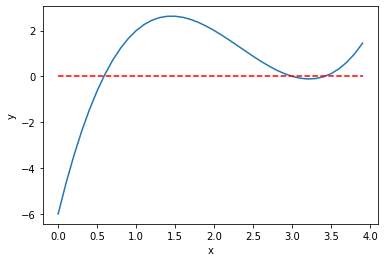

In [110]:
x = np.arange(0,4,0.1)
y = x**3-7*x**2+14*x-6 
zeros = np.zeros(len(x))
plt.plot(x,y,x,zeros, '--r')
plt.xlabel('x')
plt.ylabel('y')


### Ejercicio 2: Sea $f(x) = (x+2)(x+1)x(x-1)^3(x-2)$ ¿A cuál cero de $f$ converge el método de bisección en los siguientes intervalos? a)  $[-3,2.5]$ b) $[-2.5,3]$ y c) $[-1.75,1.5]$

#### Se definió la siguiente función que calcula la raíz de la ecuación en cuestion y cuyos valores de entrada son los límites del intervalo

In [121]:
def biseccion2(a,b):
    TOL = 0.01  #TOL es el patámetro de tolerancia para la convergencia del algoritmo
    FA = (a+2)*(a+1)*a*(a-2)*(a-1)**3  #F(a)
    FP = 100                #F(p)
    Nmax = 100
    exito = False
    i = 1
    p = 5

#Realizamos el proceso iterativo
    while i <= Nmax:
        p = a + (b-a)/2.00  # Calculamos el punto medio
        FP = (p+2)*(p+1)*p*(p-2)*(p-1)**3 
        ERR = abs(FP-FA)   #Calculamos el error relativo que queremos sea menor a 10^-2 (TOL)
        #print(i,a,b,p,FP,ERR)
        if(FP==0):   #¿Es solución?   #abs(FP)< TOL 
            print("La raíz es:")
            print(p)
            exito = True
            break   # Salir del ciclo
        elif(FA*FP > 0):
            a = p
            FA = FP
        else:
            b = p
        i = i+1
    
    if exito == False:
        print("Proceso no exitoso")

#### Llamamos la función para cada intervalo para encontrar la raíz correspondiente

In [122]:
# Para [-3,2.5]
biseccion2(-3,2.5)

La raíz es:
2.0


In [124]:
# Para [-2.5,3]
biseccion2(-2.5,3)

La raíz es:
-2.0


In [126]:
# Para  [−1.75,1.5]
biseccion2(-1.75,1.5)

La raíz es:
-1.0


### Ejercicio 3: Un abrevadero de longitud $L$ tiene una sección transversal en forma de semicírculo con radio $r$. Cuando se llena de agua hasta una distancia $h$ de la parte superior, el volumen $V$ de agua es

\begin{equation}
    V=L[0.5\pi r^2- r^2 \arcsin(h/r)-h (r^2 - h^2)^{1/2}].
\end{equation}
Suponga que $L= 10 ft$, $r=1 ft$, y que $V = 12.4 ft^3$. Determine la profundidad de agua en el abrevadero hasta 0.01 ft usando el método de la bisección.

#### Debemos encontrarla raíz de la ecuación $L[0.5\pi r^2- r^2 \arcsin(h/r)-h (r^2 - h^2)^{1/2}]$ considerando los valores de $L$, $r$ y $V$ dados. Ya que la profundidad $h$ puede tomar valores de $0$ a $r$, los límites para buscar la raíz son $a=0$ y $b=1$.

In [19]:
def profundidad(a,b):
    #Definimos los valores de las variables que da el problema
    L=10
    r=1
    V=12.4
    #Inicializamos parámetros
    TOL = 0.01  #TOL es el patámetro de tolerancia para la convergencia del algoritmo
    #L[0.5\pi r^2- r^2 \arcsin(h/r)-h (r^2 - h^2)^{1/2}]
    FA = L*(0.5*math.pi*r*r-r*r*math.asin(a/r)-a*math.sqrt(r*r-a*a))-V #F(a)
    FP = 100                #F(p)
    Nmax = 100
    exito = False
    i = 1
    p = 5

#Realizamos el proceso iterativo
    while i <= Nmax:
        p = a + (b-a)/2.00  # Calculamos el punto medio
        FP = L*(0.5*math.pi*r*r-r*r*math.asin(p/r)-p*math.sqrt(r*r-p*p))-V
        ERR = abs(FP-FA)   #Calculamos el error relativo que queremos sea menor a 10^-2 (TOL)
        #print(i,a,b,p,FP,ERR)
        if(FP==0):   #¿Es solución?   #abs(FP)< TOL 
            print("La raíz es:")
            print(p)
            exito = True
            break   # Salir del ciclo
        elif(FA*FP > 0):
            a = p
            FA = FP
        else:
            b = p
        i = i+1
    
    if exito == False:
        print("Proceso no exitoso")
    return p

In [20]:
h = profundidad(0,1)

La raíz es:
0.1661660346583682


#### La raíz encontrada es la es el valor de $h$ que satisface la ecuación. Dado que $h$ es la distancia respecto de la parte más alta del abrevadero hasta el nivel del agua, la profundidad $D= r-h$, dada por

In [21]:
print("La profundidad del abrevadero es:")
print(1-h)

La profundidad del abrevadero es:
0.8338339653416318
